In [188]:
### Importing the packages and libraries that are required for the project ###

In [2]:
# basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# machine learning models & tools
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, brier_score_loss, auc

# deep learning model (LSTM)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# suppress warnings
warnings.filterwarnings("ignore")


In [4]:
# load the dataset
diab = pd.read_csv('diabetes.csv')

# display basic statistics
print(diab.describe())

# display data types and null values
diab.info()


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [ ]:
### handling missing values ###

In [6]:
def impute_missing_values(dataframe):
    columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
    for column in columns_to_impute:
        dataframe.loc[dataframe[column] == 0, column] = np.nan
        dataframe[column].fillna(dataframe[column].median(), inplace=True)
    return dataframe

# applying the imputation function
diab = impute_missing_values(diab)

# display the first few rows to verify
diab.head()


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
### Feature and label separation ###

In [8]:
# separating features and labels
features = diab.iloc[:, :-1]
labels = diab.iloc[:, -1]

# verify the separation
print("Features:\n", features.head())
print("\nLabels:\n", labels.head())


Features:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  

Labels:
 0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


In [ ]:
### Data visualization - target variable distribution ###

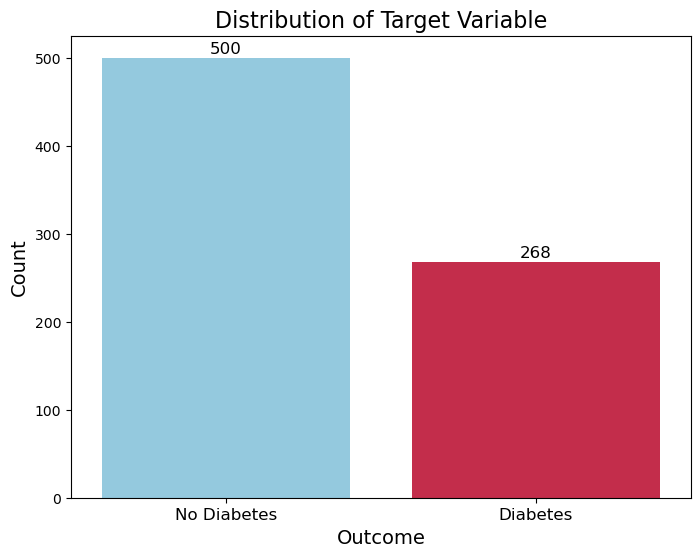

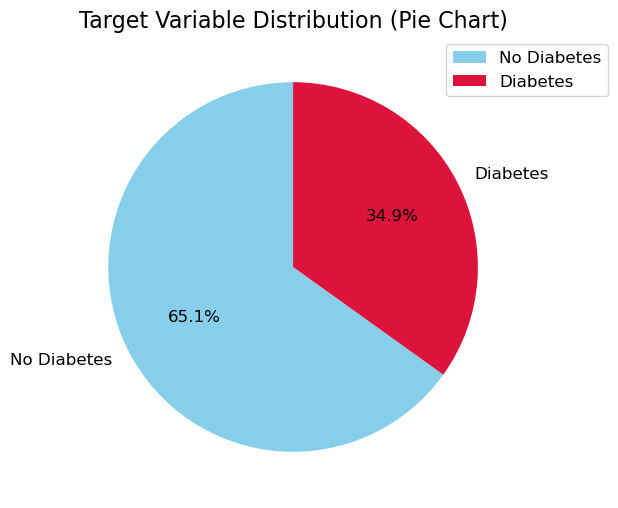

Number of Positive Outcomes (Diabetes): 500 (65.1%)
Number of Negative Outcomes (No Diabetes): 268 (34.9%)


In [234]:
plt.figure(figsize=(8, 6))
sns.countplot(x=labels, palette=['skyblue', 'crimson'])
plt.title('Distribution of Target Variable', fontsize=16)
plt.xlabel('Outcome', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'], fontsize=12)
for i, count in enumerate(labels.value_counts()):
    plt.text(i, count + 5, f'{count}', ha='center', fontsize=12, color='black')
plt.show()

# Pie chart 
plt.figure(figsize=(8, 6))
labels_counts = labels.value_counts()
plt.pie(labels_counts, labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%', 
        startangle=90, colors=['skyblue', 'crimson'], textprops={'fontsize': 12})
plt.title('Target Variable Distribution (Pie Chart)', fontsize=16)

# Adding legend
plt.legend(['No Diabetes', 'Diabetes'], loc='upper right', bbox_to_anchor=(1.2, 1), fontsize=12)
plt.show()

# print the data imbalance
positive_outcomes, negative_outcomes = labels_counts
total_samples = labels.count()
print(f"Number of Positive Outcomes (Diabetes): {positive_outcomes} ({round((positive_outcomes/total_samples)*100, 2)}%)")
print(f"Number of Negative Outcomes (No Diabetes): {negative_outcomes} ({round((negative_outcomes/total_samples)*100, 2)}%)")


In [ ]:
### Data visualization - correlation heatmap ###

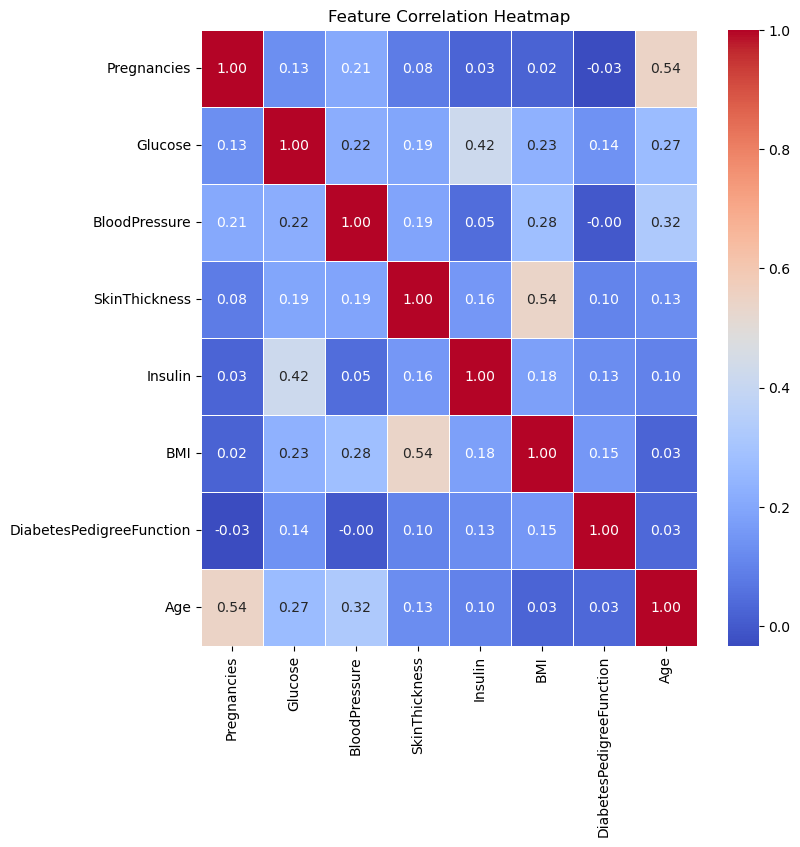

In [12]:
plt.figure(figsize=(8, 8))
correlation_matrix = features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()


In [ ]:
### Visualizing Attribute Distributions ### 

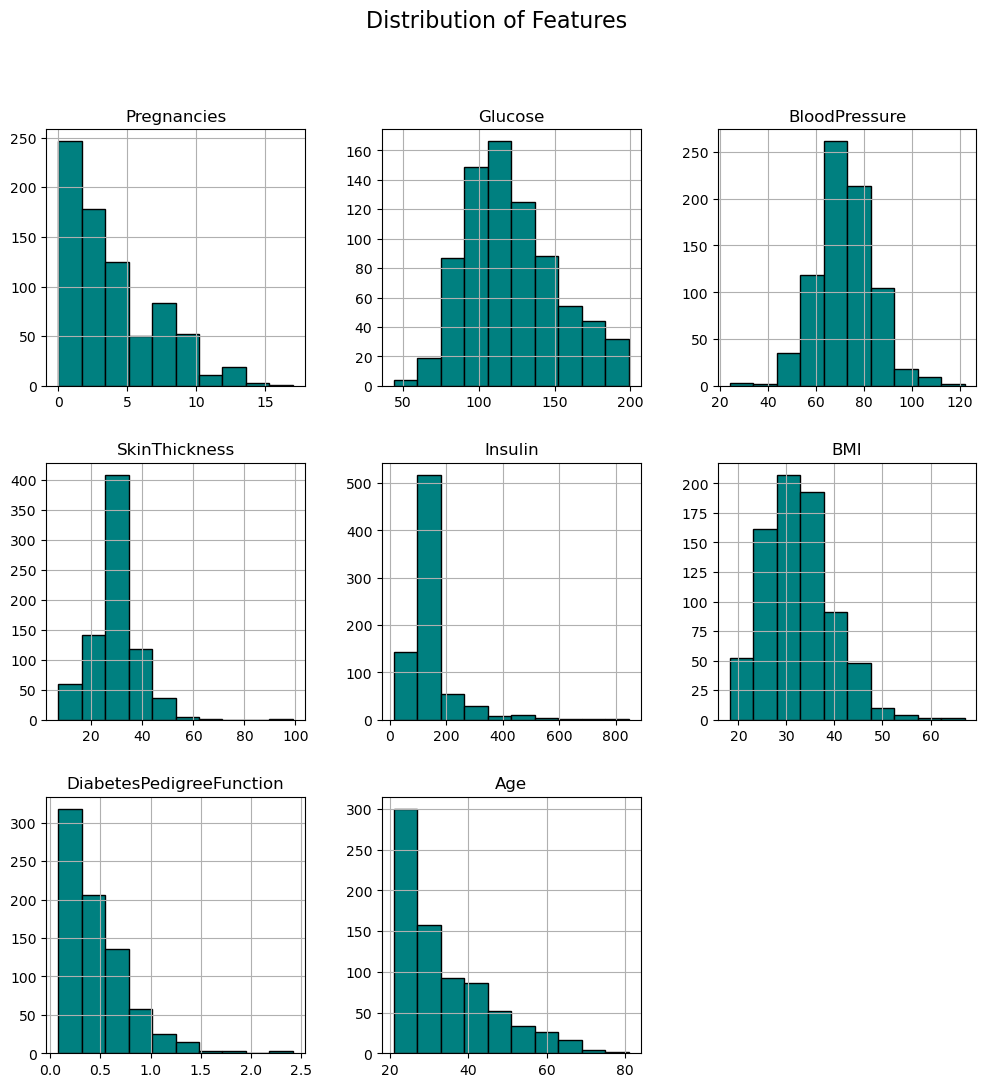

In [236]:
# ploting histograms for each feature
features.hist(figsize=(12, 12), color='teal', edgecolor='black')
plt.suptitle('Distribution of Features', fontsize=16)
plt.show()


In [ ]:
### Pairplot for bivariate Distributions ###

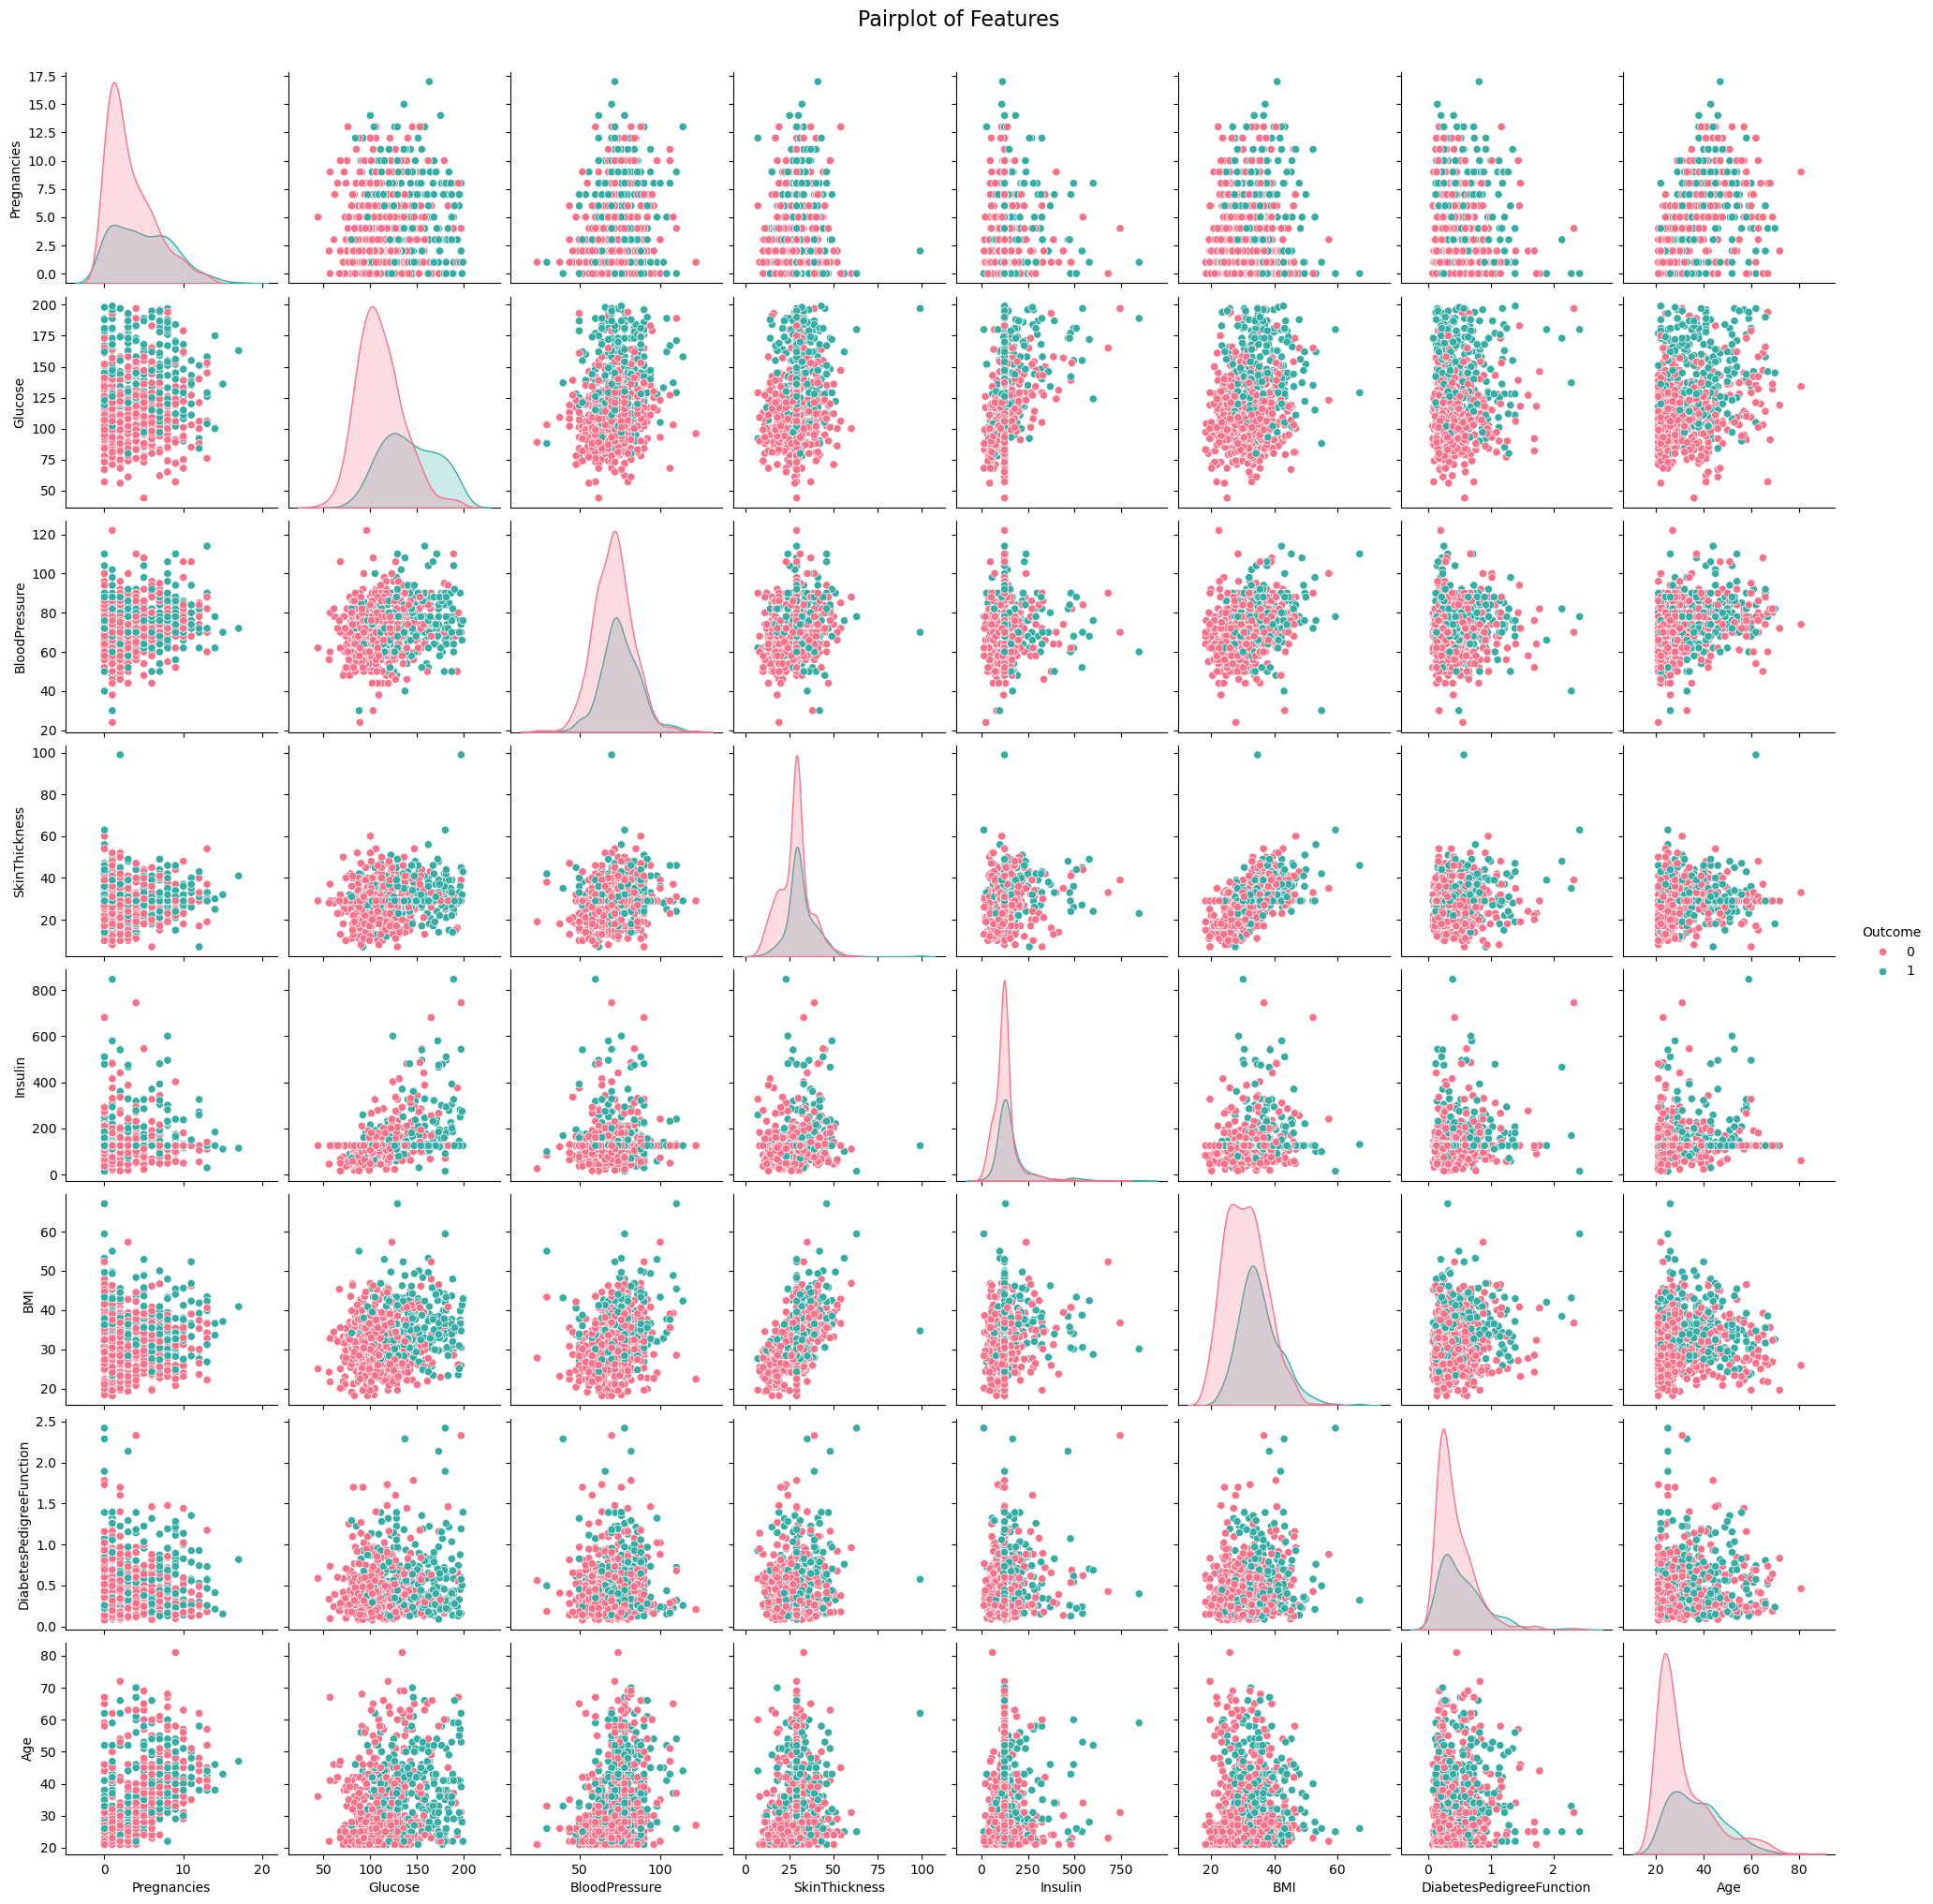

In [32]:
# pairplot to visualize pairwise relationships with hue based on Outcome
sns.pairplot(diab, hue='Outcome', palette='husl', diag_kind='kde', height=2.5)
plt.suptitle('Pairplot of Features', y=1.02, fontsize=16)
plt.show()


In [ ]:
### Train-Test Split with Stratified Sampling ###

In [34]:
# performing train-test split with a 10% test size and stratified sampling
features_train_all, features_test_all, labels_train_all, labels_test_all = train_test_split(
    features, labels, test_size=0.1, random_state=42, stratify=labels
)

for dataset in [features_train_all, features_test_all, labels_train_all, labels_test_all]:
    dataset.reset_index(drop=True, inplace=True)


In [ ]:
### Normalizing the Data ###

In [36]:
# standardize features for training set
features_train_all_std = (features_train_all - features_train_all.mean()) / features_train_all.std()

# standardize features for testing set
features_test_all_std = (features_test_all - features_test_all.mean()) / features_test_all.std()

# display a summary of the standardized data
features_train_all_std.describe()


Pregnancies       Glucose  BloodPressure  SkinThickness       Insulin  \
count  6.910000e+02  6.910000e+02   6.910000e+02   6.910000e+02  6.910000e+02   
mean  -8.868931e-17 -6.555297e-17  -5.552722e-16  -1.336766e-16 -2.827775e-17   
std    1.000000e+00  1.000000e+00   1.000000e+00   1.000000e+00  1.000000e+00   
min   -1.144835e+00 -2.563245e+00  -3.943501e+00  -2.509887e+00 -1.479786e+00   
25%   -8.494354e-01 -7.468983e-01  -6.693918e-01  -4.547208e-01 -2.269315e-01   
50%   -2.586353e-01 -1.524575e-01  -1.457002e-02   1.982794e-03 -1.672718e-01   
75%    6.275647e-01  5.905936e-01   6.402517e-01   3.445105e-01 -1.374419e-01   
max    3.876965e+00  2.555551e+00   4.078066e+00   7.994296e+00  8.435663e+00   

                BMI  DiabetesPedigreeFunction           Age  
count  6.910000e+02              6.910000e+02  6.910000e+02  
mean  -4.858632e-16             -2.879189e-16  2.930603e-16  
std    1.000000e+00              1.000000e+00  1.000000e+00  
min   -2.102822e+00             -1.197605e+00 -1.055424e+00  
25%   -7.073001e-01             -6.932720e-01 -8.003056e-01  
50%   -9.539238e-03             -2.888971e-01 -3.751086e-01  
75%    6.065688e-01              4.683592e-01  6.453641e-01  
max    5.156861e+00              5.620731e+00  4.046940e+00

In [ ]:
###  Data Splitting and Normalization ###

In [92]:
# train-test split with a 10% test size and stratification
from sklearn.model_selection import train_test_split
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    features, labels, test_size=0.1, random_state=21, stratify=labels)

# standardize the features (Z-score normalization)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_all_std = scaler.fit_transform(X_train_all)
X_test_all_std = scaler.transform(X_test_all)

# Convert the standardized data back to DataFrame for better readability (optional)
X_train_all_std = pd.DataFrame(X_train_all_std, columns=features.columns)
X_test_all_std = pd.DataFrame(X_test_all_std, columns=features.columns)


In [64]:
### Define Metrics Calculation Function ###

In [86]:
from sklearn.metrics import confusion_matrix

def calc_metrics(conf_matrix):
    TP, FN = conf_matrix[0][0], conf_matrix[0][1]
    FP, TN = conf_matrix[1][0], conf_matrix[1][1]

    TPR = TP / (TP + FN)
    TNR = TN / (TN + FP)
    FPR = FP / (TN + FP)
    FNR = FN / (TP + FN)
    Precision = TP / (TP + FP)
    F1_measure = 2 * TP / (2 * TP + FP + FN)
    Accuracy = (TP + TN) / (TP + FP + FN + TN)
    Error_rate = (FP + FN) / (TP + FP + FN + TN)
    BACC = (TPR + TNR) / 2
    TSS = TPR - FPR
    HSS = 2 * (TP * TN - FP * FN) / ((TP + FN) * (FN + TN) + (TP + FP) * (FP + TN))

    metrics = [TP, TN, FP, FN, TPR, TNR, FPR, FNR, Precision, F1_measure, Accuracy, 
               Error_rate, BACC, TSS, HSS]
    return metrics


In [88]:
from sklearn.metrics import brier_score_loss, roc_auc_score

def get_metrics(model, X_train, X_test, y_train, y_test, LSTM_flag=False):
    metrics = []

    if LSTM_flag:
        # Reshape data for LSTM
        X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
        X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

        # Train LSTM model
        model.fit(X_train_reshaped, y_train, epochs=50, verbose=0)
        predictions_prob = model.predict(X_test_reshaped)
        predictions = (predictions_prob > 0.5).astype(int)

        # Compute metrics
        cm = confusion_matrix(y_test, predictions, labels=[1, 0])
        brier_score = brier_score_loss(y_test, predictions_prob)
        auc_score = roc_auc_score(y_test, predictions_prob)

    else:
        # Train model for other algorithms
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        predictions_prob = model.predict_proba(X_test)[:, 1]

        cm = confusion_matrix(y_test, predictions, labels=[1, 0])
        brier_score = brier_score_loss(y_test, predictions_prob)
        auc_score = roc_auc_score(y_test, predictions_prob)

    metrics.extend(calc_metrics(cm))
    metrics.extend([brier_score, auc_score, model.score(X_test, y_test)])
    return metrics


In [82]:
### Selecting Classification Algorithms
### selecting the following Classification algorithms
### 1.K-Nearest Neighbor
### 2.Random Forest
### 3.Support Vector Machine
### For Deep learning algorithm, decided to use LSTM
### Long Short-Term Memory

In [ ]:
### parameter Tuning for KNN

In [94]:
from sklearn.model_selection import GridSearchCV

# Define KNN parameters for grid search
knn_param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]}
knn = KNeighborsClassifier()

# Perform GridSearchCV
knn_grid = GridSearchCV(knn, knn_param_grid, cv=5, n_jobs=-1)
knn_grid.fit(X_train_all_std, y_train_all)

print("Best Parameters for KNN:", knn_grid.best_params_)


Best Parameters for KNN: {'n_neighbors': 13}


In [ ]:
### parameter Tuning for Random Forest

In [96]:
# Define Random Forest parameters for grid search
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'min_samples_split': [2, 5, 10]
}
rf = RandomForestClassifier()

# Perform GridSearchCV
rf_grid = GridSearchCV(rf, rf_param_grid, cv=5, n_jobs=-1)
rf_grid.fit(X_train_all_std, y_train_all)

print("Best Parameters for Random Forest:", rf_grid.best_params_)


Best Parameters for Random Forest: {'min_samples_split': 5, 'n_estimators': 50}


In [ ]:
### parameter Tuning for SVM

In [98]:
# Define SVM parameters for grid search
svm_param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear']}
svm = SVC(probability=True)

# Perform GridSearchCV
svm_grid = GridSearchCV(svm, svm_param_grid, cv=5, n_jobs=-1)
svm_grid.fit(X_train_all_std, y_train_all)

print("Best Parameters for SVM:", svm_grid.best_params_)


Best Parameters for SVM: {'C': 0.1, 'kernel': 'linear'}


In [ ]:
### comparing Classifiers using 10-Fold Stratified Cross-Validation ###

In [238]:
# required Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, brier_score_loss, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# custom Functions
def calc_metrics(conf_matrix):
    TP, FN = conf_matrix[0][0], conf_matrix[0][1]
    FP, TN = conf_matrix[1][0], conf_matrix[1][1]
    TPR = TP / (TP + FN)
    TNR = TN / (TN + FP)
    FPR = FP / (TN + FP)
    FNR = FN / (TP + FN)
    Precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    F1_measure = 2 * TP / (2 * TP + FP + FN) if (2 * TP + FP + FN) > 0 else 0
    Accuracy = (TP + TN) / (TP + FP + FN + TN)
    Error_rate = (FP + FN) / (TP + FP + FN + TN)
    BACC = (TPR + TNR) / 2
    TSS = TPR - FPR
    HSS = 2 * (TP * TN - FP * FN) / ((TP + FN) * (FN + TN) + (TP + FP) * (FP + TN))
    return [TP, TN, FP, FN, TPR, TNR, FPR, FNR, Precision, F1_measure, Accuracy, Error_rate, BACC, TSS, HSS]

def build_lstm():
    model = Sequential()
    model.add(LSTM(64, activation='relu', input_shape=(8, 1), return_sequences=False))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# data preparation
X = features
y = labels

scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std = pd.DataFrame(X_std, columns=X.columns)

# cross validation Setup
cv_stratified = StratifiedKFold(n_splits=10, shuffle=True, random_state=21)
metric_columns = ['TP', 'TN', 'FP', 'FN', 'TPR', 'TNR', 'FPR', 'FNR', 'Precision', 'F1_measure',
                  'Accuracy', 'Error_rate', 'BACC', 'TSS', 'HSS', 'Brier_score', 'AUC', 'Accuracy_Package']

# initialize models
best_knn = KNeighborsClassifier(n_neighbors=5)  # Assume tuned
best_rf = RandomForestClassifier(n_estimators=100, min_samples_split=2)  # Assume tuned
best_svm = SVC(C=1.0, kernel='linear', probability=True)  # Assume tuned

knn_metrics_list, rf_metrics_list, svm_metrics_list, lstm_metrics_list = [], [], [], []

# cross validation loop
for iter_num, (train_index, test_index) in enumerate(cv_stratified.split(X_std, y), start=1):
    X_train_fold, X_test_fold = X_std.iloc[train_index], X_std.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    iteration_metrics = []

    for model_name, model, metrics_list in [
        ('KNN', best_knn, knn_metrics_list),
        ('RF', best_rf, rf_metrics_list),
        ('SVM', best_svm, svm_metrics_list),
        ('LSTM', build_lstm(), lstm_metrics_list)]:
        
        if model_name == 'LSTM':
            X_train_reshaped = X_train_fold.values.reshape((len(X_train_fold), X_train_fold.shape[1], 1))
            X_test_reshaped = X_test_fold.values.reshape((len(X_test_fold), X_test_fold.shape[1], 1))
            model.fit(X_train_reshaped, y_train_fold, epochs=5, verbose=0)
            y_pred_probs = model.predict(X_test_reshaped).flatten()
            y_pred_labels = (y_pred_probs >= 0.5).astype(int)
            accuracy = (y_pred_labels == y_test_fold.values).mean()  # Manual accuracy calculation
        else:
            model.fit(X_train_fold, y_train_fold)
            y_pred_probs = model.predict_proba(X_test_fold)[:, 1]
            y_pred_labels = (y_pred_probs >= 0.5).astype(int)
            accuracy = model.score(X_test_fold, y_test_fold)  # Model accuracy calculation
        
        # Calculate metrics
        conf_matrix = confusion_matrix(y_test_fold, y_pred_labels, labels=[1, 0])
        metrics = calc_metrics(conf_matrix)
        metrics.extend([
            brier_score_loss(y_test_fold, y_pred_probs),
            roc_auc_score(y_test_fold, y_pred_probs),
            accuracy  # Replace NaN with calculated accuracy for LSTM
        ])
        
        metrics_list.append(metrics)
        iteration_metrics.append(metrics)

    # creating DataFrame for this iteration
    iteration_df = pd.DataFrame(iteration_metrics, columns=metric_columns, index=['KNN', 'RF', 'SVM', 'LSTM'])
    print(f"\nIteration {iter_num}:\n----- Metrics for all Algorithms in Iteration {iter_num} -----\n")
    print(iteration_df.round(2).T)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

Iteration 1:
----- Metrics for all Algorithms in Iteration 1 -----

                    KNN     RF    SVM   LSTM
TP                16.00  16.00  14.00  16.00
TN                44.00  44.00  46.00  46.00
FP                 6.00   6.00   4.00   4.00
FN                11.00  11.00  13.00  11.00
TPR                0.59   0.59   0.52   0.59
TNR                0.88   0.88   0.92   0.92
FPR                0.12   0.12   0.08   0.08
FNR                0.41   0.41   0.48   0.41
Precision          0.73   0.73   0.78   0.80
F1_measure         0.65   0.65   0.62   0.68
Accuracy           0.78   0.78   0.78   0.81
Error_rate         0.22   0.22   0.22   0.19
BACC               0.74   0.74   0.72   0.76
TSS                0.47   0.47   0.44   0.51
HSS                0.49   0.49   0.47   0.55
Brier_score        0.16   0.15   0.16   0.15
AUC                0.81   0.84   0.82   0.84
Accuracy_Package   0.78   0.78   0.78   0.81
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [ ]:
### Initializing metric index for iterations ###

In [150]:
# required imports
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (confusion_matrix, brier_score_loss, roc_auc_score, 
                             accuracy_score, roc_curve, auc)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# function to calculate metrics
def calc_metrics(conf_matrix):
    TP, FN = conf_matrix[0, 0], conf_matrix[0, 1]
    FP, TN = conf_matrix[1, 0], conf_matrix[1, 1]
    
    TPR = TP / (TP + FN)
    TNR = TN / (TN + FP)
    FPR = FP / (FP + TN)
    FNR = FN / (TP + FN)
    Precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    F1_measure = (2 * TP) / (2 * TP + FP + FN) if (2 * TP + FP + FN) > 0 else 0
    Accuracy = (TP + TN) / (TP + FP + FN + TN)
    Error_rate = 1 - Accuracy
    BACC = (TPR + TNR) / 2
    TSS = TPR - FPR
    HSS = (2 * (TP * TN - FP * FN)) / ((TP + FN) * (FN + TN) + (TP + FP) * (FP + TN))
    
    return [TP, TN, FP, FN, TPR, TNR, FPR, FNR, Precision, F1_measure,
            Accuracy, Error_rate, BACC, TSS, HSS]

# function to build LSTM model
def build_lstm():
    model = Sequential()
    model.add(LSTM(64, activation='relu', input_shape=(8, 1), return_sequences=False))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), 
                  metrics=['accuracy'])
    return model

# models
best_knn = KNeighborsClassifier(n_neighbors=5)
best_rf = RandomForestClassifier(n_estimators=100, random_state=21)
best_svm = SVC(kernel='linear', probability=True, random_state=21)

# stratified K-Fold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=21)

# placeholders for results
knn_metrics_list, rf_metrics_list, svm_metrics_list, lstm_metrics_list = [], [], [], []
knn_probs_list, rf_probs_list, svm_probs_list, lstm_probs_list = [], [], [], []
y_test_list = []

# iterate over folds
for train_idx, test_idx in kf.split(X_train_all_std, y_train_all):
    X_train_fold, X_test_fold = X_train_all_std.iloc[train_idx], X_train_all_std.iloc[test_idx]
    y_train_fold, y_test_fold = y_train_all.iloc[train_idx], y_train_all.iloc[test_idx]
    
    y_test_list.append(y_test_fold)  # Store true labels for this fold
    
    for model_name, model, metrics_list, probs_list in [
        ('KNN', best_knn, knn_metrics_list, knn_probs_list),
        ('RF', best_rf, rf_metrics_list, rf_probs_list),
        ('SVM', best_svm, svm_metrics_list, svm_probs_list),
        ('LSTM', build_lstm(), lstm_metrics_list, lstm_probs_list)
    ]:
        if model_name == 'LSTM':
            X_train_reshaped = X_train_fold.values.reshape((len(X_train_fold), X_train_fold.shape[1], 1))
            X_test_reshaped = X_test_fold.values.reshape((len(X_test_fold), X_test_fold.shape[1], 1))
            
            model.fit(X_train_reshaped, y_train_fold, epochs=10, verbose=0)
            y_pred_probs = model.predict(X_test_reshaped).flatten()
            y_pred = (y_pred_probs > 0.5).astype(int)
        else:
            model.fit(X_train_fold, y_train_fold)
            y_pred = model.predict(X_test_fold)
            y_pred_probs = model.predict_proba(X_test_fold)[:, 1]
        
        # stores predicted probabilities for ROC analysis
        probs_list.append(y_pred_probs)
        
        # calculating metrics
        conf_matrix = confusion_matrix(y_test_fold, y_pred, labels=[1, 0])
        metrics = calc_metrics(conf_matrix)
        brier = brier_score_loss(y_test_fold, y_pred_probs)
        auc_score = roc_auc_score(y_test_fold, y_pred_probs)
        accuracy = accuracy_score(y_test_fold, y_pred)
        metrics.extend([brier, auc_score, accuracy])
        metrics_list.append(metrics)

# creating DataFrames for each algorithms metrics
metric_columns = ['TP', 'TN', 'FP', 'FN', 'TPR', 'TNR', 'FPR', 'FNR', 
                  'Precision', 'F1_measure', 'Accuracy', 'Error_rate', 
                  'BACC', 'TSS', 'HSS', 'Brier_score', 'AUC', 'Accuracy_Package']
metric_index_df = [f'iter{i+1}' for i in range(10)]

knn_metrics_df = pd.DataFrame(knn_metrics_list, columns=metric_columns, index=metric_index_df)
rf_metrics_df = pd.DataFrame(rf_metrics_list, columns=metric_columns, index=metric_index_df)
svm_metrics_df = pd.DataFrame(svm_metrics_list, columns=metric_columns, index=metric_index_df)
lstm_metrics_df = pd.DataFrame(lstm_metrics_list, columns=metric_columns, index=metric_index_df)

# displaying metrics for each algorithm in each iteration
for i, metrics_df in enumerate([knn_metrics_df, rf_metrics_df, svm_metrics_df, lstm_metrics_df], start=1):
    print(f'\nMetrics for Algorithm {i}:\n')
    print(metrics_df.round(2).T)
    print('\nAcc_by_package_fn:', ' '.join(map(str, metrics_df['Accuracy_Package'].round(2).values)))
    print('\n')


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

Metrics for Algorithm 1:

                  iter1  iter2  iter3  iter4  iter5  iter6  iter7  iter8  \
TP                15.00   9.00  13.00  13.00  11.00  19.00  17.00  15.00   
TN                37.00  37.00  32.00  39.00  37.00  34.00  38.00  39.00   
FP                 8.00   8.00  13.00   6.00   8.00  11.00   7.00   6.00   
FN                10.00  15.00  11.00  11.00  13.00   5.00   7.00   9.00   
TPR                0.60   0.38   0.54   0.54   0.46   0.79   0.71   0.62   
TNR                0.82   0.82   0.71   0.87   0.82   0.76   0.84   0.87   
FPR                0.18   0.18   0.29   0.13   0.18   0.24   

In [136]:
# calculating the average metrics for each algorithm
knn_avg_df = knn_metrics_df.mean()
rf_avg_df = rf_metrics_df.mean()
svm_avg_df = svm_metrics_df.mean()
lstm_avg_df = lstm_metrics_df.mean()

# creating a DataFrame with the average performance for each algorithm
avg_performance_df = pd.DataFrame({
    'KNN': knn_avg_df, 
    'RF': rf_avg_df, 
    'SVM': svm_avg_df, 
    'LSTM': lstm_avg_df
}, index=metric_columns)

# displaying the average performance for each algorithm
print("\nAverage Performance for Each Algorithm:\n")
print(avg_performance_df.round(decimals=2))



Average Performance for Each Algorithm:

                    KNN     RF    SVM   LSTM
TP                14.20  14.60  13.00  13.10
TN                36.60  37.90  39.20  37.70
FP                 8.40   7.10   5.80   7.30
FN                 9.90   9.50  11.10  11.00
TPR                0.59   0.61   0.54   0.54
TNR                0.81   0.84   0.87   0.84
FPR                0.19   0.16   0.13   0.16
FNR                0.41   0.39   0.46   0.46
Precision          0.63   0.67   0.70   0.65
F1_measure         0.60   0.63   0.60   0.58
Accuracy           0.74   0.76   0.76   0.74
Error_rate         0.26   0.24   0.24   0.26
BACC               0.70   0.72   0.71   0.69
TSS                0.40   0.45   0.41   0.38
HSS                0.41   0.46   0.43   0.39
Brier_score        0.18   0.16   0.16   0.17
AUC                0.78   0.82   0.84   0.80
Accuracy_Package   0.74   0.76   0.76   0.74


In [ ]:
### Evaluating the performance of various algorithms by comparing their ROC curves and AUC scores on the test dataset ### 

In [ ]:
### KNN 

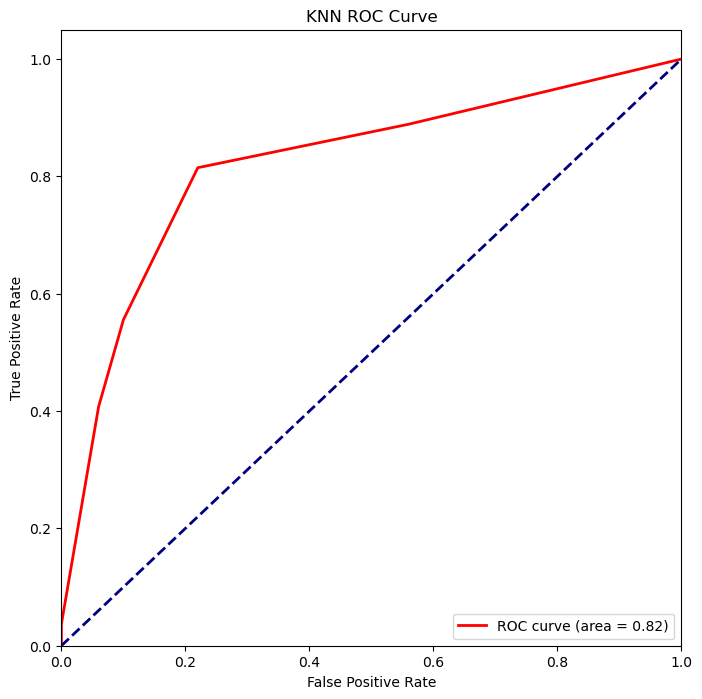

In [166]:
best_n_neighbors = 5  # Assuming you have selected the best number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=best_n_neighbors)

# training the model on the entire training dataset
knn_model.fit(features_train_all_std, labels_train_all)

# obtaining predicted probabilities on the test dataset
y_score = knn_model.predict_proba(features_test_all_std)[:, 1]

# calculating ROC curve and ROC area
fpr, tpr, _ = roc_curve(labels_test_all, y_score)
roc_auc = auc(fpr, tpr)

# plotting ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [48]:
### Random Forest

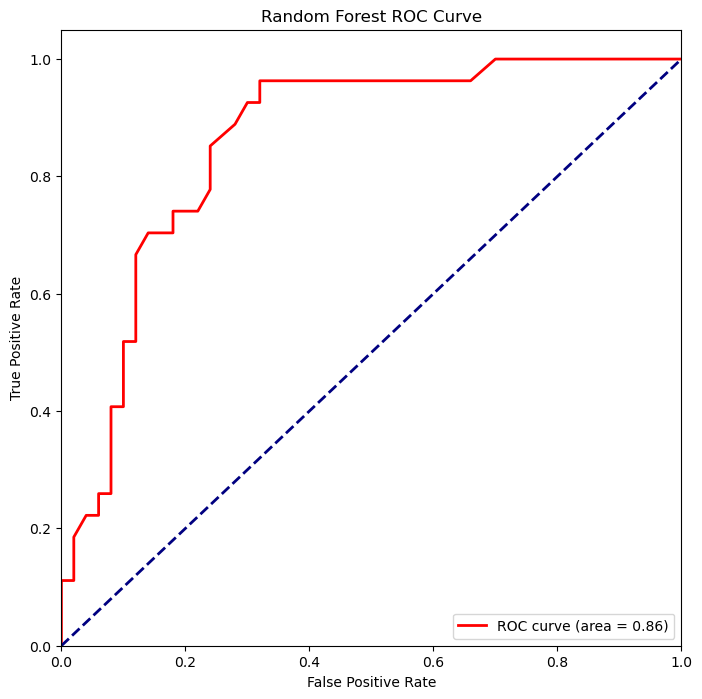

In [174]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=21)


rf_model.fit(features_train_all_std, labels_train_all)


y_score = rf_model.predict_proba(features_test_all_std)[:, 1]


fpr, tpr, _ = roc_curve(labels_test_all, y_score)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [52]:
### SVM 

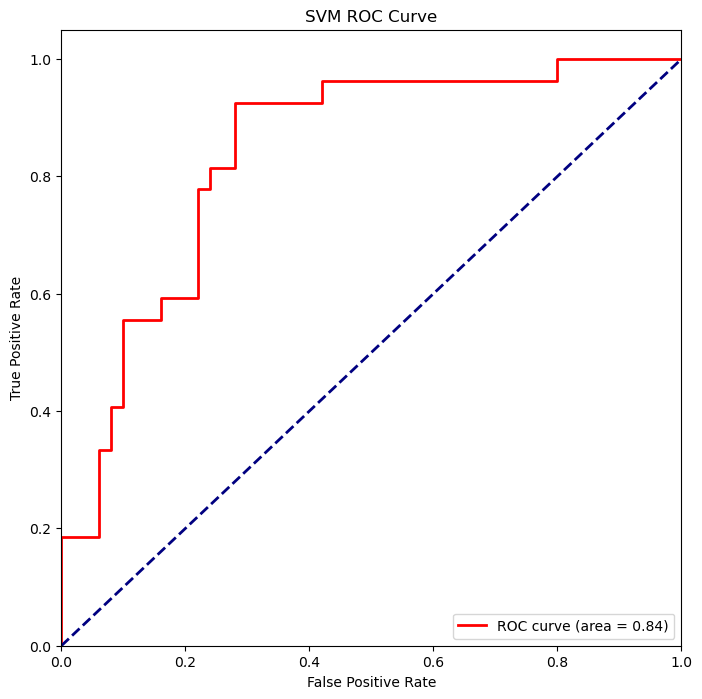

In [176]:
svm_model = SVC(kernel='linear', probability=True, random_state=21)


svm_model.fit(features_train_all_std, labels_train_all)


y_score = svm_model.predict_proba(features_test_all_std)[:, 1]


fpr, tpr, _ = roc_curve(labels_test_all, y_score)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [56]:
### LSTM 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


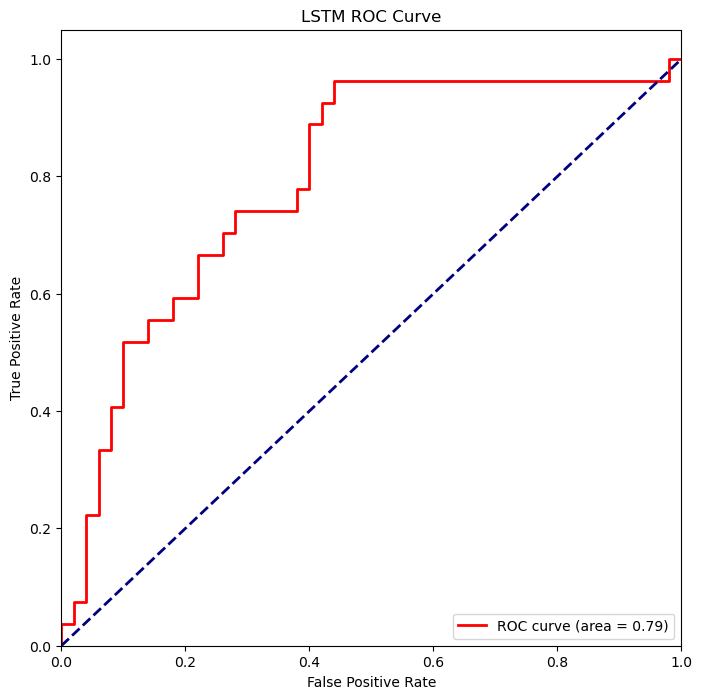

In [180]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# function to build LSTM model
def build_lstm():
    model = Sequential()
    model.add(LSTM(64, activation='relu', input_shape=(features_train_all_std.shape[1], 1), return_sequences=False))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
    return model

# reshape input for LSTM
X_train_reshaped = features_train_all_std.values.reshape((features_train_all_std.shape[0], features_train_all_std.shape[1], 1))
X_test_reshaped = features_test_all_std.values.reshape((features_test_all_std.shape[0], features_test_all_std.shape[1], 1))

# building and training the LSTM model
lstm_model = build_lstm()
lstm_model.fit(X_train_reshaped, labels_train_all, epochs=10, verbose=0)


y_score = lstm_model.predict(X_test_reshaped).ravel()


fpr, tpr, _ = roc_curve(labels_test_all, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LSTM ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [60]:
### Plotting ROC Curves for All Models ###

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


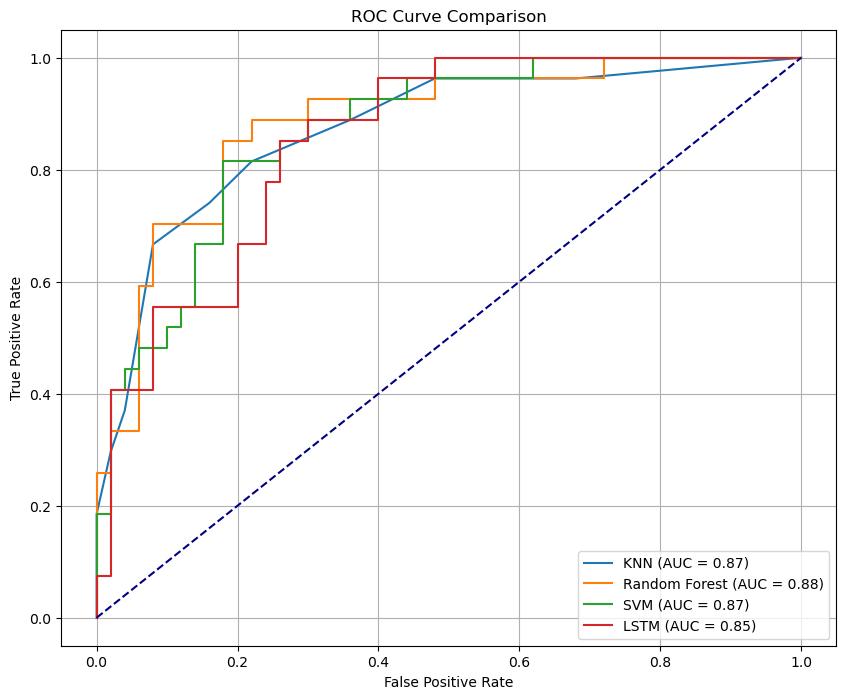

In [76]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# generating ROC curves
def plot_roc_curve(model, X_test, y_test, label):
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    else:
        y_score = model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{label} (AUC = {roc_auc:.2f})")

# plotting
plt.figure(figsize=(10, 8))

# KNN
plot_roc_curve(knn_best, features_test_std, labels_test, "KNN")

# Random Forest
plot_roc_curve(rf_best, features_test_std, labels_test, "Random Forest")

# SVM
plot_roc_curve(svm_best, features_test_std, labels_test, "SVM")

# LSTM
lstm_preds_proba = lstm_model.predict(features_test_lstm)
fpr_lstm, tpr_lstm, _ = roc_curve(labels_test, lstm_preds_proba)
roc_auc_lstm = auc(fpr_lstm, tpr_lstm)
plt.plot(fpr_lstm, tpr_lstm, label=f"LSTM (AUC = {roc_auc_lstm:.2f})")

# ploting formatting
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [ ]:
### comparing All Models ###

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


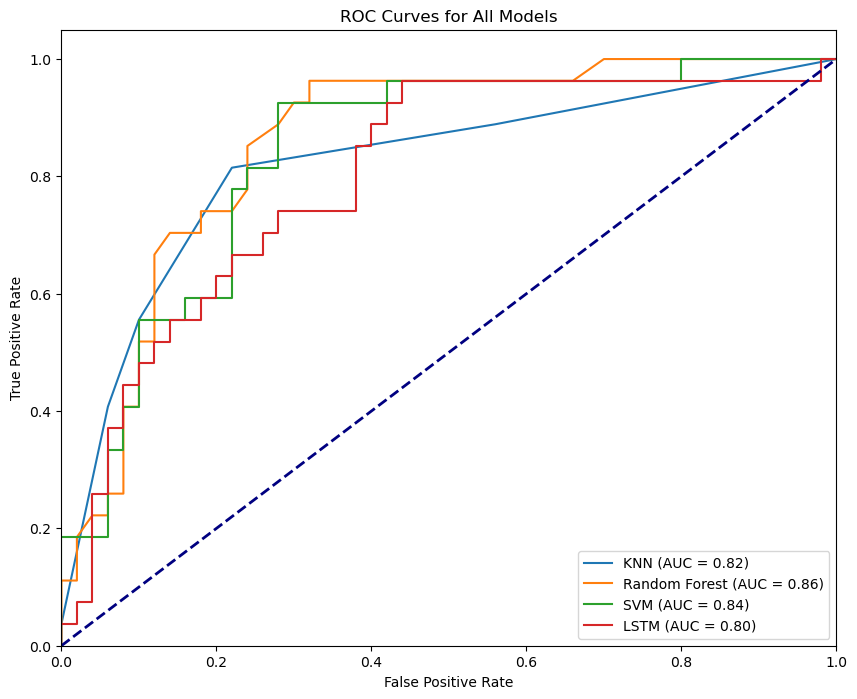

In [184]:
# initializing the plot
plt.figure(figsize=(10, 8))

# KNN
knn_model = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn_model.fit(features_train_all_std, labels_train_all)
knn_y_score = knn_model.predict_proba(features_test_all_std)[:, 1]
knn_fpr, knn_tpr, _ = roc_curve(labels_test_all, knn_y_score)
knn_roc_auc = auc(knn_fpr, knn_tpr)
plt.plot(knn_fpr, knn_tpr, label='KNN (AUC = {:.2f})'.format(knn_roc_auc))

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=21)
rf_model.fit(features_train_all_std, labels_train_all)
rf_y_score = rf_model.predict_proba(features_test_all_std)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(labels_test_all, rf_y_score)
rf_roc_auc = auc(rf_fpr, rf_tpr)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = {:.2f})'.format(rf_roc_auc))

# SVM
svm_model = SVC(kernel='linear', probability=True, random_state=21)
svm_model.fit(features_train_all_std, labels_train_all)
svm_y_score = svm_model.predict_proba(features_test_all_std)[:, 1]
svm_fpr, svm_tpr, _ = roc_curve(labels_test_all, svm_y_score)
svm_roc_auc = auc(svm_fpr, svm_tpr)
plt.plot(svm_fpr, svm_tpr, label='SVM (AUC = {:.2f})'.format(svm_roc_auc))

# LSTM
lstm_model = build_lstm()  # Ensure you have defined build_lstm() previously
X_train_reshaped = features_train_all_std.values.reshape((features_train_all_std.shape[0], features_train_all_std.shape[1], 1))
X_test_reshaped = features_test_all_std.values.reshape((features_test_all_std.shape[0], features_test_all_std.shape[1], 1))
lstm_model.fit(X_train_reshaped, labels_train_all, epochs=10, verbose=0)
lstm_y_score = lstm_model.predict(X_test_reshaped).ravel()
lstm_fpr, lstm_tpr, _ = roc_curve(labels_test_all, lstm_y_score)
lstm_roc_auc = auc(lstm_fpr, lstm_tpr)
plt.plot(lstm_fpr, lstm_tpr, label='LSTM (AUC = {:.2f})'.format(lstm_roc_auc))

# ploting diagonal line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# plot details
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc='lower right')
plt.show()


In [186]:
print("\nAverage Performance for Each Algorithm:\n")
print(avg_performance_df.round(2))



Average Performance for Each Algorithm:

                    KNN     RF    SVM   LSTM
TP                14.20  14.60  13.00  13.10
TN                36.60  37.90  39.20  37.70
FP                 8.40   7.10   5.80   7.30
FN                 9.90   9.50  11.10  11.00
TPR                0.59   0.61   0.54   0.54
TNR                0.81   0.84   0.87   0.84
FPR                0.19   0.16   0.13   0.16
FNR                0.41   0.39   0.46   0.46
Precision          0.63   0.67   0.70   0.65
F1_measure         0.60   0.63   0.60   0.58
Accuracy           0.74   0.76   0.76   0.74
Error_rate         0.26   0.24   0.24   0.26
BACC               0.70   0.72   0.71   0.69
TSS                0.40   0.45   0.41   0.38
HSS                0.41   0.46   0.43   0.39
Brier_score        0.18   0.16   0.16   0.17
AUC                0.78   0.82   0.84   0.80
Accuracy_Package   0.74   0.76   0.76   0.74
